# runningmeans

This is the second step in reproducing the cluster analysis from Sara and David following Amini et al 2019
https://doi.org/10.1007/s00382-018-4409-7

This program:
1. Reads data:
* Input File: `/project/predictability/kpegion/wxregimes/era-interim/erai.z500_u250_pna_DJF.1980-2015.nc`
2. Sorts data and time to be in chronological order
3. Makes 5-day running means
4. Extracts data for 19801201 to 20150228
5. Writes data to single netcdf file containing both variables
* Output File: `/project/predictability/kpegion/wxregimes/era-interim/erai.z500_u250_pna_5dyrm_DJF.1980-2015.nc`

In [1]:
def rm_season(da,window,yrs_list,varname):

    nt,ny,nx=da.shape
    ndays=91
    nyr=int(nt/ndays)

    ds_rm_tmp=[]
    
    for yr in yrs_list:
         
        start_date=pd.to_datetime(str(yr-1)+'1201')
        end_date=start_date+pd.DateOffset(days=ndays)
        
        print(start_date, end_date)
        ds_this_year=da.sel(time=slice(start_date,end_date))
        ds_rm_tmp.append(ds_this_year.rolling(time=window,center=True).mean().dropna(dim='time'))

    ds_rm = xr.combine_nested(ds_rm_tmp, concat_dim='time').to_dataset(name=varname)
    
    return ds_rm

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
yrs_list=np.arange(1981,2016)

### Define input and output files

In [4]:
# Input
path='/project/predictability/kpegion/wxregimes/era-interim/'
fname='erai.z500_u250_pna_DJF.1980-2015.nc'

# Output
out_path='/project/predictability/kpegion/wxregimes/era-interim/'
ofname='erai.z500_u250_pna_5dyrm_DJF.1980-2015.nc'
outfile=out_path+ofname

### Read the data

In [5]:
ds=xr.open_dataset(path+fname,decode_times=True)
ds

<xarray.Dataset>
Dimensions:  (lat: 22, lon: 53, time: 4365)
Coordinates:
  * lat      (lat) float64 79.53 76.74 73.95 71.16 ... 29.3 26.51 23.72 20.93
  * lon      (lon) float64 151.9 154.7 157.5 160.3 ... 289.7 292.5 295.3 298.1
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2015-12-31
Data variables:
    z500     (time, lat, lon) float64 ...
    u250     (time, lat, lon) float64 ...

In [6]:
#tmp=ds.sel(time='19801203')
#plt.contourf(tmp['z500'][::-1,:]/9.81)

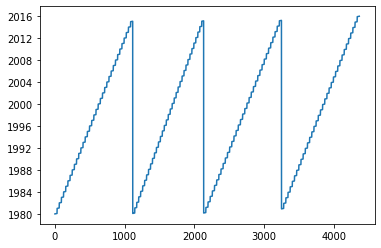

In [7]:
plt.plot(ds['time'])

In [8]:
ds=ds.reindex(time=sorted(ds['time'].values))

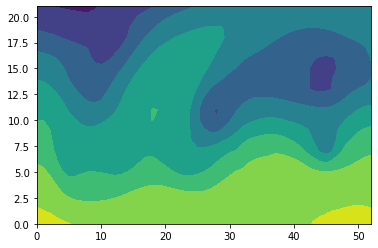

In [9]:
tmp=ds.sel(time='19801203')
plt.contourf(tmp['z500'][::-1,:]/9.81)

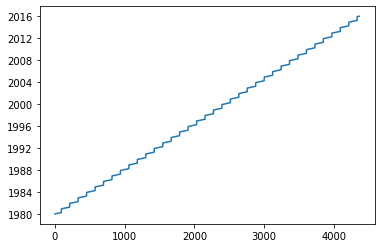

In [10]:
plt.plot(ds['time'])

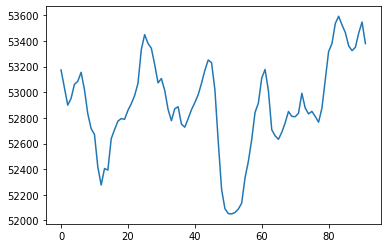

In [11]:
#plt.plot(ds['z500'][0:90,12,25])
plt.plot(ds['z500'].mean(dim=['lat','lon'])[0:92])

In [12]:
z500_rm=rm_season(ds['z500'],5,yrs_list,'z500')
u250_rm=rm_season(ds['u250'],5,yrs_list,'u250')
ds_5dayrm=xr.merge([z500_rm,u250_rm])

1980-12-01 00:00:00 1981-03-02 00:00:00
1981-12-01 00:00:00 1982-03-02 00:00:00
1982-12-01 00:00:00 1983-03-02 00:00:00
1983-12-01 00:00:00 1984-03-01 00:00:00
1984-12-01 00:00:00 1985-03-02 00:00:00
1985-12-01 00:00:00 1986-03-02 00:00:00
1986-12-01 00:00:00 1987-03-02 00:00:00
1987-12-01 00:00:00 1988-03-01 00:00:00
1988-12-01 00:00:00 1989-03-02 00:00:00
1989-12-01 00:00:00 1990-03-02 00:00:00
1990-12-01 00:00:00 1991-03-02 00:00:00
1991-12-01 00:00:00 1992-03-01 00:00:00
1992-12-01 00:00:00 1993-03-02 00:00:00
1993-12-01 00:00:00 1994-03-02 00:00:00
1994-12-01 00:00:00 1995-03-02 00:00:00
1995-12-01 00:00:00 1996-03-01 00:00:00
1996-12-01 00:00:00 1997-03-02 00:00:00
1997-12-01 00:00:00 1998-03-02 00:00:00
1998-12-01 00:00:00 1999-03-02 00:00:00
1999-12-01 00:00:00 2000-03-01 00:00:00
2000-12-01 00:00:00 2001-03-02 00:00:00
2001-12-01 00:00:00 2002-03-02 00:00:00
2002-12-01 00:00:00 2003-03-02 00:00:00
2003-12-01 00:00:00 2004-03-01 00:00:00
2004-12-01 00:00:00 2005-03-02 00:00:00


In [13]:
ds_5dayrm

<xarray.Dataset>
Dimensions:  (lat: 22, lon: 53, time: 3080)
Coordinates:
  * lat      (lat) float64 79.53 76.74 73.95 71.16 ... 29.3 26.51 23.72 20.93
  * lon      (lon) float64 151.9 154.7 157.5 160.3 ... 289.7 292.5 295.3 298.1
  * time     (time) datetime64[ns] 1980-12-03 1980-12-04 ... 2015-02-28
Data variables:
    z500     (time, lat, lon) float64 4.895e+04 4.89e+04 ... 5.784e+04 5.781e+04
    u250     (time, lat, lon) float64 6.428 6.05 5.769 ... 9.005 7.433 5.919

In [14]:
ds_5dayrm['time']

<xarray.DataArray 'time' (time: 3080)>
array(['1980-12-03T00:00:00.000000000', '1980-12-04T00:00:00.000000000',
       '1980-12-05T00:00:00.000000000', ..., '2015-02-26T00:00:00.000000000',
       '2015-02-27T00:00:00.000000000', '2015-02-28T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-12-03 1980-12-04 ... 2015-02-28

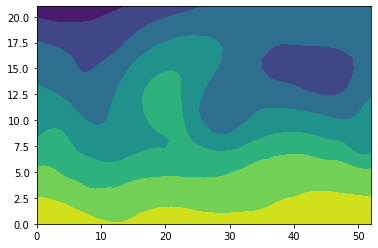

In [15]:
plt.contourf(ds_5dayrm['z500'][0,::-1,:])

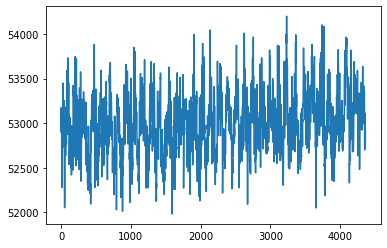

In [16]:
#plt.plot(ds_5dayrm['z500'][:,12,25])
plt.plot(ds['z500'].mean(dim=['lat','lon']))

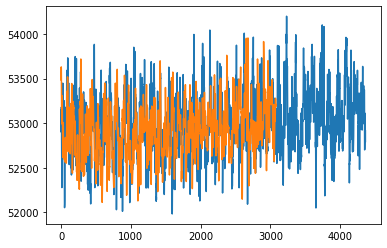

In [17]:
#plt.plot(ds['z500'][:,12,25])
#plt.plot(ds_5dayrm['z500'][:,12,25])

plt.plot(ds['z500'].mean(dim=['lat','lon']))
plt.plot(ds_5dayrm['z500'].mean(dim=['lat','lon']))

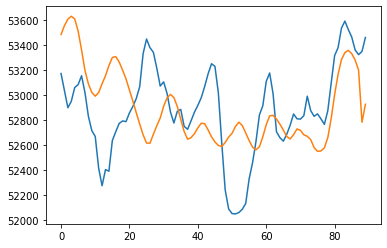

In [18]:
#plt.plot(ds['z500'][0:90,12,25])
#plt.plot(ds_5dayrm['z500'][0:90,12,25])

plt.plot(ds['z500'].mean(dim=['lat','lon'])[0:90])
plt.plot(ds_5dayrm['z500'].mean(dim=['lat','lon'])[0:90])

In [20]:
ds_5dayrm.to_netcdf(outfile)